In [26]:
import csv
import math
import matplotlib.pyplot as plt
from functools import reduce
import random


In [4]:
with open('dados2.csv', 'r') as dados:
    leitura = csv.reader(dados, delimiter = ';')
    matriz_dados = [i for i in leitura]
matriz_dados

[['Abaetetuba', '11.44'],
 ['Abel Figueiredo', '7.58'],
 ['Acarï¿½', '17.36'],
 ['Afuï¿½', '11.85'],
 ['ï¿½gua Azul do Norte', '31.11'],
 ['Alenquer', '25.13'],
 ['Almeirim', '25.67'],
 ['Altamira', '14.36'],
 ['Anajï¿½s', '14.49'],
 ['Ananindeua', '12.56'],
 ['Anapu', '10.74'],
 ['Augusto Corrï¿½a', '14.87'],
 ['Aurora do Parï¿½', '4.71'],
 ['Aveiro', '20.69'],
 ['Bagre', '25.55'],
 ['Baiï¿½o', '27.94'],
 ['Bannach', '0'],
 ['Barcarena', '10.03'],
 ['Belï¿½m', '15.5'],
 ['Belterra', '19.29'],
 ['Benevides', '14.01'],
 ['Bom Jesus do Tocantins', '10.27'],
 ['Bonito', '4.76'],
 ['Braganï¿½a', '8.93'],
 ['Brasil Novo', '9.23'],
 ['Brejo Grande do Araguaia', '10'],
 ['Breu Branco', '18.3'],
 ['Breves', '17.17'],
 ['Bujaru', '6.48'],
 ['Cachoeira do Arari', '23.32'],
 ['Cachoeira do Piriï¿½', '19.48'],
 ['Cametï¿½', '18.14'],
 ['Canaï¿½ dos Carajï¿½s', '13.63'],
 ['Capanema', '17'],
 ['Capitï¿½o Poï¿½o', '15.86'],
 ['Castanhal', '10.16'],
 ['Chaves', '17.7'],
 ['Colares', '12.74'],
 ['Conc

In [5]:
numeros = list(map(lambda x:float(x), [valor[1] for valor in matriz_dados]))

#estatistica básicas
media = reduce(lambda x,y:x+y, numeros)/len(numeros)
variancia = reduce(lambda x,y:x+(y-media)**2, numeros, 0)/len(numeros)
desv_padr = math.sqrt(variancia)
cv = desv_padr/media


In [6]:
#valores para distribuição de frequencia por classe
numeros_unicos = set(numeros)
at = max(numeros) - min(numeros)
k = int(round(math.sqrt(len(numeros))))
h = math.ceil(at/k)
classes = {}
amplitudes = []
medio = []
for i in range(k):
    if len(amplitudes) == 0:
        amplitudes.append(min(numeros))
    else:
        amplitudes.append(amplitudes[i-1]+h)

for i in range(len(amplitudes)):
    if i < k-1:
        classes[f'{amplitudes[i]}|---{amplitudes[i+1]}'] = len([x for x in numeros if x >= amplitudes[i] and x < amplitudes[i+1]])
        medio.append((amplitudes[i]+amplitudes[i+1])/2)
    else:
        classes[f'{amplitudes[i]}|---{amplitudes[i]+h}'] = len([x for x in numeros if x >= amplitudes[i] and x < amplitudes[i]+h])
        medio.append(((amplitudes[i]+(amplitudes[i]+h))/2))


In [7]:
print(f'{"Classes":^13} | {"Fi":^4}')
print(f'{"-"*14}|{"-"*5}')
for i,j in classes.items():
    print(f'{i:^13} | {j:>4}')


   Classes    |  Fi 
--------------|-----
 0.0|---3.0   |    5
 3.0|---6.0   |    7
 6.0|---9.0   |   16
 9.0|---12.0  |   21
12.0|---15.0  |   26
15.0|---18.0  |   27
18.0|---21.0  |   21
21.0|---24.0  |    4
24.0|---27.0  |   13
27.0|---30.0  |    3
30.0|---33.0  |    1
33.0|---36.0  |    0


([<matplotlib.axis.XTick at 0x1de27b2cc88>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

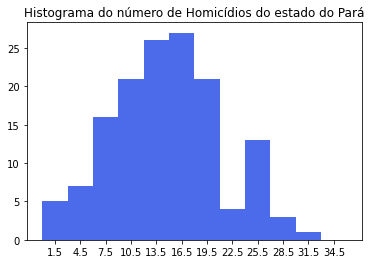

In [22]:
#plotagem do histograma
plt.bar(medio,[ t for t in classes.values()], 3, color = '#4B6BEA')
plt.title('Histograma do número de Homicídios do estado do Pará')
plt.xticks(medio)

In [23]:
#calcular o a quantidade da amostra "n"
n = (math.pow(1.96,2)*math.pow(variancia,2))/(sum(numeros)*0.05+math.pow(1.96,2)*math.pow(variancia,2)/sum(numeros))
n = math.ceil(n)
n

60

# Amostragem Aleatória Simples

In [24]:
with open('dados2.csv', 'r') as arquivo:
    ler = csv.reader(arquivo, delimiter=';')
    populacao = [entrada for entrada in ler]
populacao

[['Abaetetuba', '11.44'],
 ['Abel Figueiredo', '7.58'],
 ['Acarï¿½', '17.36'],
 ['Afuï¿½', '11.85'],
 ['ï¿½gua Azul do Norte', '31.11'],
 ['Alenquer', '25.13'],
 ['Almeirim', '25.67'],
 ['Altamira', '14.36'],
 ['Anajï¿½s', '14.49'],
 ['Ananindeua', '12.56'],
 ['Anapu', '10.74'],
 ['Augusto Corrï¿½a', '14.87'],
 ['Aurora do Parï¿½', '4.71'],
 ['Aveiro', '20.69'],
 ['Bagre', '25.55'],
 ['Baiï¿½o', '27.94'],
 ['Bannach', '0'],
 ['Barcarena', '10.03'],
 ['Belï¿½m', '15.5'],
 ['Belterra', '19.29'],
 ['Benevides', '14.01'],
 ['Bom Jesus do Tocantins', '10.27'],
 ['Bonito', '4.76'],
 ['Braganï¿½a', '8.93'],
 ['Brasil Novo', '9.23'],
 ['Brejo Grande do Araguaia', '10'],
 ['Breu Branco', '18.3'],
 ['Breves', '17.17'],
 ['Bujaru', '6.48'],
 ['Cachoeira do Arari', '23.32'],
 ['Cachoeira do Piriï¿½', '19.48'],
 ['Cametï¿½', '18.14'],
 ['Canaï¿½ dos Carajï¿½s', '13.63'],
 ['Capanema', '17'],
 ['Capitï¿½o Poï¿½o', '15.86'],
 ['Castanhal', '10.16'],
 ['Chaves', '17.7'],
 ['Colares', '12.74'],
 ['Conc

In [30]:
#selecionando a amostra
random.seed(30)
amostra_as = random.sample(populacao,60)
amostra_as

[['Ulianï¿½polis', '15.77'],
 ['Monte Alegre', '16.19'],
 ['Altamira', '14.36'],
 ['Igarapï¿½-Miri', '14'],
 ['Marabï¿½', '15.14'],
 ['Aurora do Parï¿½', '4.71'],
 ['Rio Maria', '14.23'],
 ['Porto de Moz', '27.34'],
 ['Capitï¿½o Poï¿½o', '15.86'],
 ['Benevides', '14.01'],
 ['Sï¿½o Domingos do Capim', '10.75'],
 ['Abel Figueiredo', '7.58'],
 ['Limoeiro do Ajuru', '19.23'],
 ['Almeirim', '25.67'],
 ['Belï¿½m', '15.5'],
 ['Cumaru do Norte', '10'],
 ['Rondon do Parï¿½', '7.56'],
 ['Sï¿½o Joï¿½o do Araguaia', '10.93'],
 ['Santa Bï¿½rbara do Parï¿½', '15.2'],
 ['Oriximinï¿½', '18.08'],
 ['Curuï¿½ï¿½', '14.6'],
 ['Marituba', '13.8'],
 ['Santana do Araguaia', '6.64'],
 ['Anajï¿½s', '14.49'],
 ['Gurupï¿½', '11.66'],
 ['Afuï¿½', '11.85'],
 ['Cametï¿½', '18.14'],
 ['Rurï¿½polis', '14.74'],
 ['Moju', '26.09'],
 ['Pacajï¿½', '18.09'],
 ['Castanhal', '10.16'],
 ['Prainha', '9.35'],
 ['Inhangapi', '18.52'],
 ['Santo Antï¿½nio do Tauï¿½', '13.67'],
 ['Xinguara', '16.95'],
 ['Santarï¿½m Novo', '21.05']

In [ ]:
#dividindo